#**1. Request – Post & Get**

Переходя по ссылкам, мы делаем запрос для интернета. К примеру, написав `perm.hse.ru`, мы обращаемся к определенному адресу. Компьютер, на котором хранится этот сайт, отправляет нашему компьютеру "текст" в формает HTML. Браузер получает этот "текст" и интерпретирует его. Так, веб-страницы предстают для нас в удобочитаемом виде. <br>
Мы видим, что браузер только интерпретирует информацию, а запросы мы можем отправлять сами, в том числе и с помощью Python.
Библиотека [`requests` ](https://requests.readthedocs.io/en/latest/) позволяет отправлять и получать запросы на удаленные серверы.

In [ ]:
import requests

Существует два типа запросов: get (получить) и post (отправить): <br>

*   Get-запросы мы отправляем, когда переходим по ссылке. Мы просим удлаенный сервер дать нам информацию (HTML-страницу), находящуюся по определенной ссылке.
*   Post-запросы – это ввод какой-либо информации и отправка её на этот сервер. К примеру, когда мы вводим логин и пароль, мы совершаем post-запрос.

Сегодня мы будем работать с get-запросами. Мы проанализируем образ ресторанов "Вкусно – и точка" в России. Каждоем исследование начинается с Wikipedia.
Давайте попробуем получить эту странциу: https://ru.wikipedia.org/wiki/Вкусно_—_и_точка



In [ ]:
requests.get('https://ru.wikipedia.org/wiki/Вкусно_—_и_точка')

<Response [200]>

<Response [200]>: статус-код 200 означает, что подключение выполнено успешно. Вы можете подробней прочитать о статус-кодах: https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

Как вы думаете, получилось ли  у нас перейти по этой ссылке?

In [ ]:
requests.get('https://leroymerlin.ru/')

<Response [403]>

Другой способ проверить подключение – это метод .ok

In [ ]:
r = requests.get('https://ru.wikipedia.org/wiki/Вкусно_—_и_точка')
print(type(r))

<class 'requests.models.Response'>


In [ ]:
requests.get('https://leroymerlin.ru/').ok

False

Мы можем проверить и status_code

In [ ]:
good = requests.get('https://ru.wikipedia.org/wiki/Вкусно_—_и_точка')
bad = requests.get('https://ru.wikipedia.org/wiki/Вкусно_точка')

In [ ]:
good.ok

NameError: name 'good' is not defined

In [ ]:
bad.ok

False

In [ ]:
good.status_code

200

In [ ]:
bad.status_code

404

Мы видим, что подключение прошло успешно, но не видим содержание страницы. Давайте используем метод .text

In [ ]:
good.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="ru" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Вкусно — и точка — Википедия</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"89cb74c1-2732-4916-b235-6a5ef7c85a6a","wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Вкусно_—_и_точка","wgTitle":"Вкусно — и точка","wgCurRevisionId":134633067,"wgRevisionId":134633067,"wgArticleId":9762383,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Страницы, использующие повторяющиеся аргументы в вызовах шаблонов","Википедия:Cite web (не указан язык)",\n"Википедия:Cite web (недоступные ссылки без ар

Давайте скопируем эту информацию и создадим файл в формате .html у себя на компьютере.

**Задание 1.** Выберите другую компанию для анализа. Попробуйте выгрузить её страницу на Wikipedia

#**2. Библиотека BeautifulSoup**
Достаточно сложно, но можно работать с такой разметкой. Для упрощения сбора информации разработана библиотека [BeautifulSoup ](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(good.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

Метод .prettify() позволяет открыть страницу в красивом виде.

In [ ]:
#использование метода .prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="ru">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Вкусно — и точка — Википедия\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"89cb74c1-2732-4916-b235-6a5ef7c85a6a","wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Вкусно_—_и_точка","wgTitle":"Вкусно — и точка","wgCurRevisionId":134633067,"wgRevisionId":134633067,"wgArticleId":9762383,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Страницы, использующие повторяющиеся аргументы в вызовах шаблонов","Википедия:Cite web (не указан язык)",\n"Википедия:Cite web (нед

Теперь мы можем выполнять навигацию по этой странице и найти нужные нам элементы. Давайте попробуем найти заголовки (title)

In [ ]:
#давайте попробуем спарсить цитату

<blockquote><p>Это длинное название. Представьте себе, что один молодой человек говорит другому: «Пойдём во „Вкусно и точку“». Здесь простейший аналог — это <a class="mw-redirect" href="/wiki/%D0%A1%D0%B1%D0%B5%D1%80" title="Сбер">Сбер</a>. Взяли и сократили, а точнее, официально ввели в оборот.</p></blockquote>


In [ ]:
print(soup.title)
print(type(soup.title))

<title>Вкусно — и точка — Википедия</title>
<class 'bs4.element.Tag'>


In [ ]:
print(soup.find('title'))
print(type(soup.find('title')))

<title>Вкусно — и точка — Википедия</title>
<class 'bs4.element.Tag'>


Нам возвращают не строки, а объекты класса 'bs4.element.Tag'. У этого класса есть несколько элементов:

In [ ]:
#.name - имя тега

'blockquote'

In [ ]:
#.string - содержание тега

In [ ]:
#.text - текст тега

In [ ]:
#soup.title.text

'Вкусно — и точка — Википедия'

Давайте обратимся к главному тегу,` <body>`, для сбора текста из него.

In [ ]:
#soup.text.body

Отлично, уже что-то получается, но как нам найти не весь текст, а только нужный нам? <br>
В таком случае нам поможет метод .find_all(). Так, разные заголовки имеют теги h1, h2, h3 и так далее. Мы можем попробовать собрать их.

In [ ]:
#попробуем найти все цитаты

Это длинное название. Представьте себе, что один молодой человек говорит другому: «Пойдём во „Вкусно и точку“». Здесь простейший аналог — это Сбер. Взяли и сократили, а точнее, официально ввели в оборот.
-------
Возможно, и не вкладывались такие силы, которые необходимы для того, чтобы действительно проработать все вещи. Было понятно, что в этот срок все равно не успеют проработать. Было бы очень правильно взять некоторую паузу. Ситуация будет такова, что все договорятся — нужен новый ребрендинг, нужен новый нейминг, но на это дадут время. И за это время разрабатывается что-то более серьезное, которое не только нормально пройдет проверку патентной чистоты, но и будет воспринято и аудиторией, и населением как-то иначе — не так, как в этот раз произошло. Вывески пока заменены в ограниченном числе ресторанов. Я не думаю, что это большие траты. Это не трагедия.
-------


In [ ]:
#попробуем найти заголовки h2

Содержани
История
Меню
Критика
См. также
Примечания
Ссылки
Навигаци


In [ ]:
#можно посмотреть и ссылки и получить их по методу .get('href')

In [ ]:
#можно посмотреть и ссылки
#давайте создадим словарь: {название ссылки: ссылка}

In [ ]:
#оставим только ссылки, которые больше 3-х слов:

In [ ]:
del source['лицензии Creative Commons «С указанием авторства — С сохранением условий» (CC BY-SA)']

#**3. Работа с текстом** <br>
Как собрать текст? Если мы посмотрим структуру страницы, то увидим, что текст находится в поле `<p>`

In [ ]:
#попробуем найти тэг <p>

Мы можем проанализировать текст по плану предыдущего занятия и добавить ещё один интересный элемент – разметку именных сущностей. Для начала сделаем функцию, которая позволит нам объединить токенизацию, лемматизацию и очистку от стоп-слов в один блок.

In [ ]:
import requests
r = requests.get('https://ru.wikipedia.org/wiki/%D0%92%D0%BA%D1%83%D1%81%D0%BD%D0%BE_%E2%80%94_%D0%B8_%D1%82%D0%BE%D1%87%D0%BA%D0%B0')
soup = BeautifulSoup(r.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [ ]:
#мы будем осуществлять лемматизацию на pymorphy2, потому что он быстрее работает. Если у вас есть время, то лучше использовать pymystem3
!pip install pymorphy2
!pip install -U pymorphy2-dicts-ru

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 58.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=34e9636c521b8a48f88c02254eac393055e0c6cb72285cdc8b740d40a897bba8
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
from nltk.tokenize import word_tokenize
import nltk
import pymorphy2
from string import punctuation
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download("stopwords")
morph = pymorphy2.MorphAnalyzer()
punct = punctuation + '—«»'
russian_stopwords = stopwords.words("russian") + ['год', 'сеть']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# как работает лемматайзер morph.parse(w)[0].normal_form

In [ ]:
def preprocessing(text):
  lemms = [morph.parse(w)[0].normal_form for w in word_tokenize(text)
                                                    if w not in punct
                                                    and w not in russian_stopwords]
                                                    #and w.isalpha()
  return [w for w in lemms if w not in russian_stopwords]

In [ ]:
t = ''
for i in soup.find_all('p'):
  t += i.text.replace('\n', '')
print(t)

«Вкусно — и точка» — российская сеть ресторанов быстрого питания, созданная на базе сети McDonald’s после её закрытия в России в связи со вторжением России на Украину[1][2][3] и полной продажи всего российского бизнеса предпринимателю Александру Говору[4][5]. Открытие первых ресторанов сети состоялось 12 июня 2022 года[⇨].8 марта 2022 года из-за санкций, наложенных на Россию, компания McDonald’s объявила о временной остановке деятельности в России[6][7][8]. Вместе с тем было заявлено, что сеть ресторанов продолжит выплачивать зарплаты российским работникам[9][10].16 мая компания объявила о полном уходе из России[11], а также о полной продаже всего российского бизнеса предпринимателю Александру Говору[12] с возможностью через несколько лет выкупить свои активы обратно[13][14].Юридическое лицо осталось прежним, но было переименовано из ООО «Макдоналдс» в ООО «Система ПБО»[15]. Генеральный директор McDonald’s в России Олег Пароев остался на своём посту. С 1 июня 2022 года к юрлицу присоед

In [ ]:
lemms = preprocessing(t)
print(' '.join(lemms))

вкусно точка российский сеть ресторан быстрый питание создать база сеть mcdonald ’ s её закрытие россия связь вторжение россия украина 1 2 3 полный продажа российский бизнес предприниматель александр говор 4 5 открытие первый ресторан сеть состояться 12 июнь 2022 год ⇨ .8 март 2022 год из-за санкция наложить россия компания mcdonald ’ s объявить временной остановка деятельность россия 6 7 8 вместе заявить сеть ресторан продолжить выплачивать зарплата российский работник 9 10 .16 май компания объявить полный уход россия 11 также полный продажа российский бизнес предприниматель александр говор 12 возможность несколько год выкупить свой актив обратно 13 14 .юридический лицо остаться прежний переименовать ооо макдоналдс ооо система пбо 15 генеральный директор mcdonald ’ s россия олег парой остаться свой пост 1 июнь 2022 год юрлицо присоединиться региональный дочка петербургский ооо срп 18,4 млрд рубль московский ооо юрп 13 млрд рубль 2021 год выручка превысить 75 млрд рубль 16 .кром олег п

In [ ]:
from collections import Counter
freq_w = Counter(lemms)
freq_w.most_common(10)

[('ресторан', 29),
 ('сеть', 28),
 ('точка', 23),
 ('вкусно', 20),
 ('название', 17),
 ('год', 15),
 ('июнь', 13),
 ('россия', 11),
 ('рубль', 11),
 ('также', 10)]

In [ ]:
freq_bigramms = Counter(nltk.bigrams(lemms))
freq_bigramms.most_common(10)

[(('вкусно', 'точка'), 19),
 (('сеть', 'ресторан'), 12),
 (('2022', 'год'), 9),
 (('mcdonald', '’'), 5),
 (('’', 's'), 5),
 (('ресторан', 'сеть'), 4),
 (('июнь', '2022'), 4),
 (('генеральный', 'директор'), 4),
 (('млрд', 'рубль'), 4),
 (('появиться', 'информация'), 4)]

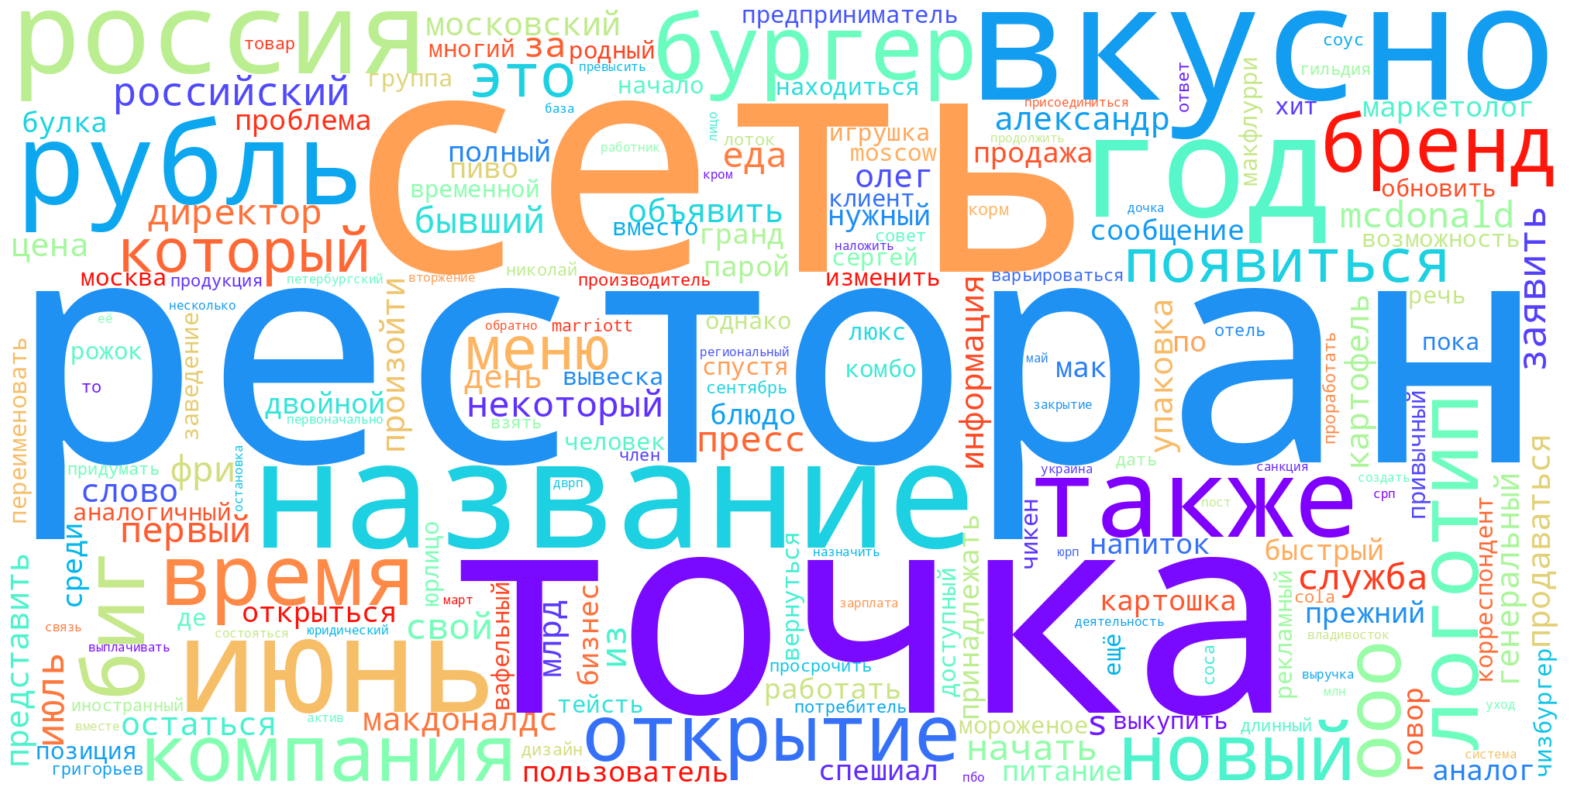

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
lemmas_ = ', '.join(lemms)
wordcloud = WordCloud(height=1000, width=2000, background_color='white', colormap='rainbow_r', collocations=False).generate(lemmas_)
plt.figure( figsize=(20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

А теперь мы добавим излечение именных сущностей, то есть посмотрим, какие компании, персоны и локации упоминаются в тексте. Для этого мы будем использовать библиотеку [Spacy](https://spacy.io/)

In [ ]:
!pip install -U pip setuptools wheel --user
!pip install -U spacy
!python -m spacy download ru_core_news_sm #скачаем модель, которая работает с русским (она маленькая)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 58.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
2023-12-08 14:12:56.804211: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 14:12:56.804279: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempt

In [ ]:
t = ''
for i in soup.find_all('p'):
  t += i.text.replace('\n', '')
print(t)

В модели spacy очень удобно работать с текстом:

In [ ]:
#как работает модель spacy на примере:
text = '''В России подорожали автомобили Lada.
При этом, как и обещал президент «АвтоВАЗа» Максим Соколов, подорожание не коснулось базовых моделей Lada Granta и Lada Vesta.'''

Давайте попробуем обработать текст с Википедии:

In [ ]:
import spacy
nlp = spacy.load('ru_core_news_sm') #загрузим модель
doc = nlp(t)

In [ ]:
list(doc.sents)[0]

«Вкусно — и точка» — российская сеть ресторанов быстрого питания, созданная на базе сети McDonald’s после её закрытия в России в связи со вторжением России на Украину[1][2][3] и полной продажи всего российского бизнеса предпринимателю Александру Говору[4][5].

In [ ]:
for ent in doc.ents:
  print(ent.lemma_[:ent.lemma_.find('[')], '->', ent.label_)

mcdonald’ -> ORG
росси -> LOC
росси -> LOC
украину -> LOC
александр говору -> PER
росси -> LOC
mcdonald’ -> ORG
россии -> ORG
александр говору -> PER
ооо "макдоналдс -> ORG
ооо "система пбо» -> ORG
mcdonald’ -> ORG
росси -> LOC
олег парое -> PER
ооо "срп -> ORG
ооо "юрп -> ORG
олег парое -> PER
ооо "дврп -> ORG
владивосто -> LOC
александр гово -> PER
ооо "справочник -> ORG
новокузнец -> LOC
mcdonald’ -> ORG
росси -> LOC
свободный касс -> ORG
mcdonald’ -> ORG
росси -> LOC
москв -> LOC
московский области -> LOC
санкт-петербур -> LOC
пушкинский площад -> LOC
москв -> LOC
сергей собянин -> PER
газеты.r -> ORG
вкусны -> ORG
олег парое -> PER
leo burnett mosco -> ORG
starcom mosco -> ORG
росси -> LOC
вкусны -> ORG
ленинградский вокза -> ORG
ооо "развитие рост» -> ORG
олег пароев -> PER
макдоналд -> ORG
александр меркуло -> PER
макдоналд -> ORG
чикен премье -> ORG
чикен хи -> ORG
макчике -> ORG
маккаф -> ORG
хэппи Ми -> ORG
двойной биг спешиал комб -> ORG
аргумент и фак -> ORG
владимир полупа

In [ ]:
#сохраним результаты
LOC = []
PER = []
ORG = []
for ent in doc.ents:
    if ent.label_ == 'LOC':
        if ent.lemma_ not in LOC:
            LOC.append(ent.lemma_)
    if ent.label_ == 'PER':
         if ent.lemma_ not in PER:
            PER.append(ent.lemma_)
    if ent.label_ == 'ORG':
        if ent.lemma_ not in ORG:
            ORG.append(ent.lemma_)

In [ ]:
def save_ent(ent, file_name):
  with open(f'{file_name}.txt', 'w', encoding='UTF8') as f:
    for i in set(ent):
        f.write(i +'\n')
  f.close()

In [ ]:
save_ent(LOC, 'LOC')
save_ent(PER, 'PER')
save_ent(ORG, 'ORG')

In [ ]:
from spacy import displacy
displacy.render(doc, style="ent", page=True, jupyter=True)

NameError: name 'doc' is not defined

**Задание 2.** Выберите свой бренд и проанализируйте, что о нём написано в Википедии.

#**4. Гуляем по ссылкам**

Посмотрим публикации "Lenta.ru" в архиве на тему "Экономика" за 2023 год.


[Ссылка на поиск](https://lenta.ru/rubrics/economics/2022/06/12/)


In [ ]:
import requests as rq
from bs4 import BeautifulSoup
page = rq.get('https://lenta.ru/rubrics/economics/2023/12/08')
soup = BeautifulSoup(page.text, 'html.parser')
soup.prettify()

'<!DOCTYPE html>\n<html lang="ru">\n <head>\n  <title>\n   Новости за  8 декабря 2023: Lenta.ru\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="#292929" name="theme-color"/>\n  <link href="https://m.lenta.ru/rubrics/economics/2023/12/08/" media="only screen and (max-width: 640px)" rel="alternate"/>\n  <link href="https://lenta.ru/rss/google-newsstand/main/" rel="alternate" type="application/rss+xml"/>\n  <link href="https://lenta.ru/rubrics/economics/2023/12/08/" rel="canonical"/>\n  <link href="/manifest.json" rel="manifest"/>\n  <link href="https://icdn.lenta.ru/favicon.ico" rel="shortcut icon" type="image/x-icon"/>\n  <link href="https://icdn.lenta.ru/images/icons/icon-256x256.png" rel="apple-touch-icon" size="256x256" type="image/x-icon"/>\n  <link href="https://icdn.lenta.ru/images/icons/icon-192x192.png" rel="apple-touch-icon" size="192x192" type="image/x-icon"/>\n  <link href="https://icdn.lenta.ru/images/icons/icon-152x152.png" rel="apple-touch-icon" size="152x152" typ

Нам нужен следующий алгоритм:
1. Создадим список новостей с упоминанием бренда "Вкусно и точка" или "Макдоналдс";
2. Соберем заголовки, ссылки и даты, которые лежат в тэге `<a>` с классом `card-full-news _subrubric`
3. Остановимся, если дойдем до мая

In [ ]:
news = soup.findAll('a', class_='card-full-news _archive') #найти все ссылки на странице
for i in news: #для каждой ссылки
  print(i.get('href')) #напечатай ссылку
  print(i.find('h3').text) #напечатай заголовок
  print(i.find('time').text) #напечатай время

/news/2023/12/08/nazvana-data-podorozhaniya-alkogolya-v-rossii/
В России предрекли подорожание алкоголя в 2024 году
02:15
/news/2023/12/08/putin-predlozhil-strahovat-dolgosrochnye-investitsionnye-scheta-rossiyan/
Путин предложил страховать долгосрочные инвестиционные счета россиян
02:31
/news/2023/12/08/fas-predlozhila-zapretit-kompaniyam-ustanavlivat-zavyshennye-tseny-na-tovary/
ФАС предложила запретить компаниям устанавливать завышенные цены на товары
04:16
/news/2023/12/08/postavki-rossiyskoy-stali-v-kitay-ruhnuli/
Поставки российской стали в Китай рухнули
07:28
/news/2023/12/08/animatori/
Назван доход российских аниматоров в роли Деда Мороза и Снегурочки
07:32
/news/2023/12/08/ssha-vtroe-narastili-zakupki-urana-iz-rossii/
США втрое нарастили закупки урана из России
07:38
/news/2023/12/08/v-rossii-nashli-sposob-borby-s-rezkim-rostom-tsen/
В России нашли способ борьбы с резким ростом цен
07:58
/news/2023/12/08/v-rossii-zahoteli-reshat-problemu-kadrovogo-defitsita-za-schet-gosudarstva

In [ ]:
#сделаем алгоритм
def scraper(page):
  soup = BeautifulSoup(page.text, 'html.parser')
  all_news = soup.findAll('a', class_='card-full-news _archive')
  v_i_t = []
  for n in all_news:
    if 'Вкусно — и' in n.find('h3').text or 'Макд' in n.find('h3').text:
      v_i_t.append([n.find('h3').text, n.find('time').text, n.get('href')])
  return(v_i_t)

In [ ]:
#превратим число в строку
def to_string(integer):
  i = str(integer)
  if len(i) < 2:
      i = '0' + i
  return i

In [ ]:
v_i_t_news = []
for month in range(1, 12):
  m = to_string(month)
  for day in range(1, 32):
    d = to_string(day)
    page = rq.get('https://lenta.ru/rubrics/economics/2023/'+ m +'/'+ d +'/')
    if page.ok:
      v_i_t_news.extend(scraper(page))

In [ ]:
#мы собрали 27 новостей
len(v_i_t_news)

6

In [ ]:
import pandas as pd
df = pd.DataFrame(v_i_t_news, columns=['title', 'date', 'link'])
df.head()

title                    date  \
0       «Вкусно — и точка» повысит цены почти на все     09:54, 19 июня 2023   
1                   «Вкусно — и точка» повысила цены     12:36, 26 июня 2023   
2  Яндекс Еда и Маркет Деливери ускорят доставку ...      10:25, 5 июля 2023   
3  Владелец «Вкусно — и точка» оценил возможность...  07:05, 4 сентября 2023   
4  «Вкусно — и точка» попросила McDonald's разреш...  12:51, 4 сентября 2023   

                          link  
0       /news/2023/06/19/ceny/  
1   /news/2023/06/26/nevkusno/  
2        /news/2023/07/05/bkn/  
3  /news/2023/09/04/mcdonalds/  
4        /news/2023/09/04/mcd/

Нам надо извлечь текст новости и автора. Давайте посмотрим, как выглядит [новость](https://lenta.ru/news/2022/11/16/mmc/).

In [ ]:
page = rq.get('https://lenta.ru/news/2023/06/19/ceny/')
soup = BeautifulSoup(page.text, 'html.parser')
soup.prettify()

'<!DOCTYPE html>\n<html lang="ru">\n <head>\n  <title>\n   «Вкусно — и точка» повысит цены почти на все: Рынки: Экономика: Lenta.ru\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="#292929" name="theme-color"/>\n  <link href="https://m.lenta.ru/news/2023/06/19/ceny/" media="only screen and (max-width: 640px)" rel="alternate"/>\n  <link href="https://lenta.ru/rss/google-newsstand/main/" rel="alternate" type="application/rss+xml"/>\n  <link href="https://lenta.ru/news/2023/06/19/ceny/" rel="canonical"/>\n  <link href="/manifest.json" rel="manifest"/>\n  <link href="https://icdn.lenta.ru/favicon.ico" rel="shortcut icon" type="image/x-icon"/>\n  <link href="https://icdn.lenta.ru/images/icons/icon-256x256.png" rel="apple-touch-icon" size="256x256" type="image/x-icon"/>\n  <link href="https://icdn.lenta.ru/images/icons/icon-192x192.png" rel="apple-touch-icon" size="192x192" type="image/x-icon"/>\n  <link href="https://icdn.lenta.ru/images/icons/icon-152x152.png" rel="apple-touch-icon

In [ ]:
#как мы можем найти автора
author = soup.find('a', class_='topic-authors__author')
author.text

'Вячеслав Агапов'

In [ ]:
#а здесь находится текст
article = soup.findAll('p', class_='topic-body__content-text')
for a in article:
  print(a.text)

С 26 июня «Вкусно — и точка» повысит цены на 5-8 процентов почти на все меню из-за подорожавших ингредиентов и проблем с логистикой. Об этом со ссылкой на собственные источники сообщает Telegram-канал Mash.
Стоимость чизкейка в ресторанах сети вырастет со 175 до 185 рублей. Обычные круассаны подорожают с 99 до 109 рублей, а круассаны с ветчиной и сыром — со 139 до 150 рублей. Изменение цен не затронет только напитки, сообщает Mash.
Первый ресторан под брендом «Вкусно — и точка» открылся в Москве 12 июня 2022 года после того, как бывший владелец ресторанов — «Макдоналдс» — ушел из России. Впоследствии заведения начали открываться в других городах и регионах России.
Спустя несколько месяцев после перезапуска сети фастфуда «Вкусно — и точка» подняла цены на бургеры на 8-10 процентов. Так, «Биг спешл» подорожал с 269 до 290 рублей, «Гранд» — с 164 до 175, а классический гамбургер — с 55 до 59 рублей. Представители бренда объяснили изменение ценников повышением себестоимости продуктов.
В де

In [ ]:
authors = []
articles = []
for l in df.link:
  page = rq.get('https://lenta.ru/' + l)
  soup = BeautifulSoup(page.text, 'html.parser')
  author = soup.find('a', class_='topic-authors__author')
  authors.append(author.text)
  t = ''
  article = soup.findAll('p', class_='topic-body__content-text')
  for a in article:
    t += a.text.replace('\xa0', '')
  articles.append(t)
df['author'] = authors
df['text'] = articles

In [ ]:
df.head()

title                    date  \
0       «Вкусно — и точка» повысит цены почти на все     09:54, 19 июня 2023   
1                   «Вкусно — и точка» повысила цены     12:36, 26 июня 2023   
2  Яндекс Еда и Маркет Деливери ускорят доставку ...      10:25, 5 июля 2023   
3  Владелец «Вкусно — и точка» оценил возможность...  07:05, 4 сентября 2023   
4  «Вкусно — и точка» попросила McDonald's разреш...  12:51, 4 сентября 2023   

                          link            author  \
0       /news/2023/06/19/ceny/   Вячеслав Агапов   
1   /news/2023/06/26/nevkusno/    Софья Ермакова   
2        /news/2023/07/05/bkn/  Татьяна Романова   
3  /news/2023/09/04/mcdonalds/     Марина Совина   
4        /news/2023/09/04/mcd/    Софья Ермакова   

                                                text  
0  С 26 июня «Вкусно — и точка» повысит цены на 5...  
1  Cеть ресторанов «Вкусно — и точка» с 26 июня п...  
2  Клиенты Яндекс Еды и Маркет Деливери будут быс...  
3  Владелец сети ресторанов «Вкусно — и точка» Ал...  
4  Сеть ресторанов быстрого питания «Вкусно — и т...

In [ ]:
#мы можем посмотреть, какие новости написал Платон Щукин
df[df.author == 'Софья Ермакова']

title                    date  \
1                   «Вкусно — и точка» повысила цены     12:36, 26 июня 2023   
4  «Вкусно — и точка» попросила McDonald's разреш...  12:51, 4 сентября 2023   

                         link          author  \
1  /news/2023/06/26/nevkusno/  Софья Ермакова   
4       /news/2023/09/04/mcd/  Софья Ермакова   

                                                text  
1  Cеть ресторанов «Вкусно — и точка» с 26 июня п...  
4  Сеть ресторанов быстрого питания «Вкусно — и т...

Давайте теперь добавим персон, локации и организации, которые упоминаются в новости

In [ ]:
import spacy
nlp = spacy.load('ru_core_news_sm')

In [ ]:
LOCs = []
PERs = []
ORGs = []
for t in df.text:
  doc = nlp(t)
  LOC = []
  PER = []
  ORG = []
  for ent in doc.ents:
    if 'вкусно' in ent.lemma_.lower() or 'макд' in ent.lemma_.lower():
      continue
    if ent.label_ == 'LOC':
        if ent.lemma_ not in LOC:
          LOC.append(ent.lemma_)
    if ent.label_ == 'PER':
        if ent.lemma_ not in PER:
          PER.append(ent.lemma_)
    if ent.label_ == 'ORG':
        if ent.lemma_ not in ORG:
          ORG.append(ent.lemma_)
  LOCs.append(', '.join(LOC))
  PERs.append(', '.join(PER))
  ORGs.append(', '.join(ORG))

In [ ]:
df['LOCs'] = LOCs
df['PERs'] = PERs
df['ORGs'] = ORGs
df.head()

title                    date  \
0       «Вкусно — и точка» повысит цены почти на все     09:54, 19 июня 2023   
1                   «Вкусно — и точка» повысила цены     12:36, 26 июня 2023   
2  Яндекс Еда и Маркет Деливери ускорят доставку ...      10:25, 5 июля 2023   
3  Владелец «Вкусно — и точка» оценил возможность...  07:05, 4 сентября 2023   
4  «Вкусно — и точка» попросила McDonald's разреш...  12:51, 4 сентября 2023   

                          link            author  \
0       /news/2023/06/19/ceny/   Вячеслав Агапов   
1   /news/2023/06/26/nevkusno/    Софья Ермакова   
2        /news/2023/07/05/bkn/  Татьяна Романова   
3  /news/2023/09/04/mcdonalds/     Марина Совина   
4        /news/2023/09/04/mcd/    Софья Ермакова   

                                                text  \
0  С 26 июня «Вкусно — и точка» повысит цены на 5...   
1  Cеть ресторанов «Вкусно — и точка» с 26 июня п...   
2  Клиенты Яндекс Еды и Маркет Деливери будут быс...   
3  Владелец сети ресторанов «Вкусно — и точка» Ал...   
4  Сеть ресторанов быстрого питания «Вкусно — и т...   

                                                LOCs  \
0                                     москва, россия   
1                                      москва, розан   
2                                                еда   
3                            россия, санкт-петербург   
4  россия, хэйхэ, амур, благовещенск, америка, бе...   

                                       PERs  \
0                               олег пароев   
1                                             
2  яндекс еды, маркет деливери, еда, яндекс   
3                    александр говор, говор   
4                    александр говор, говор   

                                 ORGs  
0         telegram-канал, mash, гранд  
1         маккафе, риа новость, гранд  
2                              яндекс  
3  mcdonald’s, тасс.«у, газпром нефть  
4                    mcdonald's, тасс

In [ ]:
df.to_excel('vkusno_i_tochka.xlsx')

**Задание на семинар - 1 балл.**
Соберите новости о каком-либо бренде за период с 1 января по 8 декабря 2023 года с сайта Lenta.ru . Выгрузите файл в .xlsx таблице

In [ ]:
#выполните задание

**6. Работа с таблцами**

Если на сайте есть таблица, то мы можем загрузить её сразу в Pandas

In [ ]:
import pandas as pd
banks = pd.read_html('https://cbr.ru/currency_base/daily/', decimal=',')
print(banks)

[    Цифр. код Букв. код  Единиц                                    Валюта  \
0          36       AUD       1                      Австралийский доллар   
1         944       AZN       1                     Азербайджанский манат   
2          51       AMD     100                          Армянских драмов   
3         933       BYN       1                         Белорусский рубль   
4         975       BGN       1                            Болгарский лев   
5         986       BRL       1                          Бразильский реал   
6         348       HUF     100                       Венгерских форинтов   
7         410       KRW    1000                      Вон Республики Корея   
8         704       VND   10000                        Вьетнамских донгов   
9         344       HKD       1                        Гонконгский доллар   
10        981       GEL       1                           Грузинский лари   
11        208       DKK       1                             Датская крона  

In [ ]:
data = pd.DataFrame(banks[0])
data

Цифр. код Букв. код  Единиц                                    Валюта  \
0          36       AUD       1                      Австралийский доллар   
1         944       AZN       1                     Азербайджанский манат   
2          51       AMD     100                          Армянских драмов   
3         933       BYN       1                         Белорусский рубль   
4         975       BGN       1                            Болгарский лев   
5         986       BRL       1                          Бразильский реал   
6         348       HUF     100                       Венгерских форинтов   
7         410       KRW    1000                      Вон Республики Корея   
8         704       VND   10000                        Вьетнамских донгов   
9         344       HKD       1                        Гонконгский доллар   
10        981       GEL       1                           Грузинский лари   
11        208       DKK       1                             Датская крона   
12        784       AED       1                                Дирхам ОАЭ   
13        840       USD       1                                Доллар США   
14        978       EUR       1                                      Евро   
15        818       EGP      10                         Египетских фунтов   
16        356       INR      10                           Индийских рупий   
17        360       IDR   10000                       Индонезийских рупий   
18        398       KZT     100                       Казахстанских тенге   
19        124       CAD       1                          Канадский доллар   
20        634       QAR       1                            Катарский риал   
21        417       KGS      10                          Киргизских сомов   
22        156       CNY       1                            Китайский юань   
23        498       MDL      10                           Молдавских леев   
24        554       NZD       1                     Новозеландский доллар   
25        934       TMT       1                   Новый туркменский манат   
26        578       NOK      10                           Норвежских крон   
27        985       PLN       1                           Польский злотый   
28        946       RON       1                             Румынский лей   
29        960       XDR       1     СДР (специальные права заимствования)   
30        941       RSD     100                          Сербских динаров   
31        702       SGD       1                       Сингапурский доллар   
32        972       TJS      10                         Таджикских сомони   
33        764       THB      10                         Таиландских батов   
34        949       TRY      10                              Турецких лир   
35        860       UZS   10000                           Узбекских сумов   
36        980       UAH      10                         Украинских гривен   
37        826       GBP       1  Фунт стерлингов Соединенного королевства   
38        203       CZK      10                              Чешских крон   
39        752       SEK      10                             Шведских крон   
40        756       CHF       1                         Швейцарский франк   
41        710       ZAR      10                    Южноафриканских рэндов   
42        392       JPY     100                              Японских иен   

       Курс  
0    606475  
1    539060  
2    227260  
3    285884  
4    504682  
5    187227  
6    258134  
7    701257  
8    382615  
9    117503  
10   342069  
11   132399  
12   249531  
13   916402  
14   988409  
15   296636  
16   109933  
17   589857  
18   199257  
19   673974  
20   251759  
21   102598  
22   127893  
23   516836  
24   565237  
25   261829  
26   839796  
27   228068  
28   198963  
29  1217614  
30   843581  
31   685673  
32   835859  
33   260166  
34   317094  
35   744729  
36   249890  
37  1152284  
38   405201  
39   876940  
40  1047077  
41   486638  
42   636390